<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# ***Singular-Value Decomposition (SVD)***

$ \ $

Singular Value Decomposition (SVD) is a matrix factorization technique that decomposes a matrix into three separate matrices. Mathematically, for a given matrix $A$, the SVD can be represented as:

$$A = U \cdot Σ \cdot V^{T}$$

Where:

- $U$ is an orthogonal matrix representing the left singular vectors of $A$.

- $Σ$ is a diagonal matrix containing the singular values of $A$.

- $V^{T}$ is the transpose of an orthogonal matrix representing the right singular vectors of $A$.

The singular values in $Σ$ are non-negative and arranged in descending order along the diagonal. The singular vectors in $U$ and $V^{T}$ are orthonormal, meaning their columns are orthogonal to each other and have unit norm.

$SVD$ provides a way to factorize a matrix into its constituent parts, allowing us to understand the underlying structure and properties of the matrix. It has several applications in various fields, including image compression, data analysis, recommendation systems, and dimensionality reduction.

$SVD$ is closely related to principal component analysis (PCA), where the SVD of the data matrix is used to find the principal components. By retaining a subset of the singular values and corresponding singular vectors, we can approximate the original matrix with reduced dimensionality, which is useful for dimensionality reduction tasks.

In summary, $SVD$ decomposes a matrix into three parts: left singular vectors, singular values, and right singular vectors, providing insights into the structure and properties of the matrix and enabling various applications such as data compression and dimensionality reduction.

$ \ $

-----

## ***Objectives***

$ \ $


*   **Understand** what is SVD in terms of Matrix Decomposition.


*   **Understand** Truncated SVD.


*   **Apply** Truncated SVD  using numpy and Sklearn.


*   **Apply** Truncated SVD  to real data.


*   **Understand** the relationship between SVD and PCA (optional).


$ \ $

-----

## ***Setup***

$ \ $

For this lab, we will be using the following libraries:

*   [Pandas](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for managing the data.


*   [Numpy](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for mathematical operations.


*   [Seaborn](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for visualizing the data.


*   [Matplotlib](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for visualizing the data.


*   [Sklearn](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for machine learning and machine-learning-pipeline related functions.

$ \ $

-----

## ***Datasets***

$ \ $

Download and unzip the datasets:

In [1]:
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/traffic.tar.gz"
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/peds.tar.gz"
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/boats.tar.gz"

--2023-07-07 12:03:21--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/traffic.tar.gz
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10080037 (9.6M) [application/x-tar]
Saving to: ‘traffic.tar.gz’

traffic.tar.gz      100%[===================>]   9.61M  11.0MB/s    in 0.9s    

2023-07-07 12:03:22 (11.0 MB/s) - ‘traffic.tar.gz’ saved [10080037/10080037]

--2023-07-07 12:03:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/peds.tar.gz
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-

In [2]:
!tar -xvf traffic.tar.gz
!tar -xvf peds.tar.gz
!tar -xvf boats.tar.gz

._traffic
traffic/
traffic/._frame_59.jpg
traffic/frame_59.jpg
traffic/._frame_71.jpg
traffic/frame_71.jpg
traffic/._frame_65.jpg
traffic/frame_65.jpg
traffic/._frame_188.jpg
traffic/frame_188.jpg
traffic/._frame_163.jpg
traffic/frame_163.jpg
traffic/._frame_177.jpg
traffic/frame_177.jpg
traffic/._frame_176.jpg
traffic/frame_176.jpg
traffic/._frame_162.jpg
traffic/frame_162.jpg
traffic/._frame_189.jpg
traffic/frame_189.jpg
traffic/._frame_64.jpg
traffic/frame_64.jpg
traffic/._frame_70.jpg
traffic/frame_70.jpg
traffic/._frame_58.jpg
traffic/frame_58.jpg
traffic/._frame_99.jpg
traffic/frame_99.jpg
traffic/._frame_66.jpg
traffic/frame_66.jpg
traffic/._frame_72.jpg
traffic/frame_72.jpg
traffic/._frame_174.jpg
traffic/frame_174.jpg
traffic/._frame_160.jpg
traffic/frame_160.jpg
traffic/._frame_148.jpg
traffic/frame_148.jpg
traffic/._frame_149.jpg
traffic/frame_149.jpg
traffic/._frame_161.jpg
traffic/frame_161.jpg
traffic/._frame_175.jpg
traffic/frame_175.jpg
traffic/._frame_73.jpg
traffic/fr

$ \ $

-----

## ***Installing required libraries***

$ \ $


The following required modules are pre-installed in the Skills Network Labs environment.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from os import listdir,getcwd
from os.path import isfile, join
from random import randint
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sympy import Matrix, init_printing,Symbol
from numpy.linalg import qr,eig,inv,matrix_rank,inv,svd
init_printing()

In [4]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

$ \ $

-----

## ***Defining Helper functions***

$ \ $

The following function will be usefull in this notebook.

In [5]:
# Esta funcion recibe un argumento opcional mypath, que tiene un valor predeterminado de "peds". Esta función se encarga de obtener datos de una matriz.
def get_data_Matrix(mypath = "peds"):

    # La función getcwd() es parte del módulo os en Python y se utiliza para obtener el directorio de trabajo actual (current working directory, en inglés). Devuelve una cadena que representa la ruta absoluta del directorio actual en el sistema de archivos.
    cwd = getcwd()

    # La variable mypath se establece concatenando la ruta actual (cwd) con el valor de mypath.
    mypath = join(cwd, mypath)

    # crea una lista vacía para almacenar los nombres de archivo de las imágenes.
    files = []

    # realizamos una iteracion sobre los elementos dentro del directorio mypath
    for f in listdir(mypath):

      #  verifica si f es un archivo (no un directorio) y si no comienza con un punto (para evitar archivos ocultos).
      if isfile(join(mypath, f)) and f.startswith(".") == False:

        # creamos la ruta completa al archivo.
        x = join(mypath, f)

        #  agrega la ruta completa del archivo a la lista de files.
        files.append(x)

    # Se lee la primera imagen del directorio
    img = Image.open(files[0])

    # La imagen img se convierte en un array NumPy utilizando np.array(img)
    I = np.array(img)

    # Se obtienen las dimensiones de la imagen I
    Length, Width = I.shape

    # e crea un array NumPy llamado X de ceros, con un tamaño de (cantidad de archivos, longitud × ancho).
    X = np.zeros((len(files), Length * Width))

    # Se itera sobre cada archivo en la lista files usando un bucle for y la variable de iteración file.
    for i, file in enumerate(files):

        # En cada iteración, se abre la imagen file
        img = Image.open(file)

        # La imagen img se convierte en un array NumPy
        I = np.array(img)

        # Se reorganiza el array I en una matriz de una sola fila utilizando I.reshape(1, -1) y se guarda en la fila i del array X.
        X[i, :] = I.reshape(1,-1)

    # Finalmente, la función retorna el array X, así como las variables Length y Width.
    return X, Length, Width

$ \ $

-----

## ***Singular Value Decomposition***

$ \ $


The $SVD$ of a matrix $X$ is a factorization that expresses $X$ as the product of three matrices: $U$, $Σ$, and $V^{T}$ (the transpose of $V$). Each of these matrices has specific properties and interpretations.

> $(1)$ $\color{lightgreen}{\text{Matrix X}}$: This is the original matrix that we want to decompose. It can be of any size $N\times D$, where $N$ represents the number of rows and $D$ represents the number of columns.

> $(2)$ $\color{lightgreen}{\text{Matrix U}}$: $U$ is an $N \times N$ matrix, and its columns $u_{1}, u_{2}, ..., u_{N}$ are called the left singular vectors. These vectors form an orthonormal basis for the column space of $X$. The left singular vectors correspond to the directions in the input space that contribute the most to the overall structure of the data.

> $(3)$ $\color{lightgreen}{\text{Matrix Σ}}$: $Σ$ is an $N \times D$ diagonal matrix. The diagonal entries of $Σ$, denoted as $σ_{1}, σ_{2}, ..., σ_{r}$, are the nonnegative singular values of $X$. They represent the singular values in descending order of importance. The number $r$ corresponds to the rank of $X$, which determines the number of non-zero singular values.

> $(4)$ $\color{lightgreen}{\text{Matrix V}}$: $V$ is a $D\times D$ matrix, and its columns $v_{1}, v_{2}, ..., v_{D}$ are referred to as the right singular vectors. These vectors form an orthonormal basis for the column space of the transpose of $X$. The right singular vectors represent the directions in the output space that are most relevant to the understanding of the data.

When we multiply the matrices $U, Σ$, and $V^{T}$ together, we obtain the original matrix $X$. Mathematically, it can be represented as:

$$X = UΣV^{T}.$$

The SVD is a powerful tool that has numerous applications in various fields, such as:

* Data compression,

* Dimensionality reduction,

* Image processing,

* Linear least squares optimization.



$ \ $

-----

## ***Example***

$ \ $

$(1)$ Consider the matrix  $X$.

In [6]:
X = np.array([[1  ,2],
              [2,  1],
              [3,  3]])

Matrix(X)

⎡1  2⎤
⎢    ⎥
⎢2  1⎥
⎢    ⎥
⎣3  3⎦

$ \ $

$(2)$ We can perform $SVD$ on any matrix in numpy by using the function `svd` from `numpy.linalg`.

In [7]:
# el siguiente codigo calcula la descomposición SVD de la matriz X y almacena las matrices U, s y VT como resultados. Estas matrices son útiles para analizar la estructura y las características de los datos contenidos en X.
U, s, VT = svd(X, full_matrices = False)

$ \ $

$(3)$ We have the left singular vectors of $\mathbf{X}$.

In [8]:
Matrix(U)

⎡-0.408248290463863    0.707106781186548  ⎤
⎢                                         ⎥
⎢-0.408248290463863   -0.707106781186547  ⎥
⎢                                         ⎥
⎣-0.816496580927726  -1.57698996923239e-16⎦

$ \ $

$(4)$ We have the singular values of $X$, as the output is an $1$ - dimensional array we use the function ***np.diag*** to convert the output into a diagonal matrix.

In [9]:
S = np.diag(s)

Matrix(S)

⎡5.19615242270663   0 ⎤
⎢                     ⎥
⎣       0          1.0⎦

$ \ $

$(5)$ Finally we have the right singular vectors of $X$, as the output is transposed they are the rows of matrix $V^{T}$.

In [10]:
Matrix(VT)

⎡-0.707106781186547  -0.707106781186547⎤
⎢                                      ⎥
⎣-0.707106781186547  0.707106781186547 ⎦

$ \ $

$(6)$ We can reconstruct the matrix $X$.


In [11]:
# se realiza una multiplicación matricial para reconstruir la matriz original X a partir de las matrices U, S y VT que se obtuvieron en la descomposición SVD. '@' es el operador de multiplicación matricial en Python. U representa la matriz de vectores singulares izquierdos, S es una matriz diagonal que contiene los valores singulares y VT es la matriz de vectores singulares derechos. El resultado es la matriz X_1 reconstruida utilizando la descomposición SVD.
X_1 = U @ S @ VT

# Aquí se redondean los elementos de la matriz X_1. La función np.round() de NumPy se utiliza para redondear los valores a los números enteros más cercanos.
X_1 = np.round(X_1)

Matrix(X_1)
# Esta línea de código parece ser una llamada a una función llamada "Matrix()".

⎡1.0  2.0⎤
⎢        ⎥
⎢2.0  1.0⎥
⎢        ⎥
⎣3.0  3.0⎦

$ \ $

-----

## ***Truncated SVD***

$ \ $

Cada valor singular $σ_{i}$, puede considerarse como una medida de la redundancia de una matriz de rango $1$ generada por $u_{i}v^{T}_{i}$. Un valor $σ_{i}$ más pequeño indica que la matriz de rango $1$ correspondiente, que puede interpretarse como un "componente" individual de $X$, tiene menos importancia en términos de la cantidad de varianza/información que preserva.
A medida que la importancia o redundancia de la información contenida en la matriz disminuye, el valor singular $σ_{i}$ asociado tiende a cero. Al retener solo los "componentes" más importantes de $X$, podemos aproximar $X$ mediante una suma ponderada de $L$ matrices de rango $1$, donde $L < r$:

$$X \approx \sum \limits_{i = 1}^{L} σ_{i}u_{i}v^{T}_{i}$$

$(1)$ Consider the following matrix, the columns are almost linearly independent.


In [12]:
# X tiene tamaño 3x2
X = np.array([[1, 2],
              [2, 4],
              [4, 8.0001]])
Matrix(X)

⎡1.0   2.0  ⎤
⎢           ⎥
⎢2.0   4.0  ⎥
⎢           ⎥
⎣4.0  8.0001⎦

$ \ $

$(2)$ We perform SVD.

In [13]:
# En esta línea, se realiza la descomposición en valores singulares de la matriz X. La función svd toma la matriz X como entrada y devuelve tres matrices: U, s y VT. U es una matriz unitaria (cuadrada) que contiene los vectores singulares izquierdos, s es un vector que contiene los valores singulares, y VT es la transpuesta conjugada de una matriz unitaria que contiene los vectores singulares derechos. El parámetro full_matrices=False se utiliza para obtener una descomposición "truncada", lo que significa que se devolverán matrices de menor tamaño si hay valores singulares cero.
U, s, VT = svd(X, full_matrices = False)

In [14]:
# U tiene tamaño 3x2
Matrix(U)

⎡-0.218216227631016  -0.390360958635871⎤
⎢                                      ⎥
⎢-0.436432455262033  -0.780721917180071⎥
⎢                                      ⎥
⎣-0.872873639189798  0.487946318776521 ⎦

In [15]:
# En esta línea, se crea una matriz diagonal S utilizando el vector de valores singulares s. La función np.diag toma un vector como entrada y devuelve una matriz diagonal con los elementos del vector en la diagonal y ceros en todas las demás posiciones.
# s = array([1.02470288e+01, 2.18216228e-05])
S = np.diag(s)

# Esta línea no es necesaria para el código en sí, pero suponiendo que se está utilizando la biblioteca numpy.matrix, esta línea convierte la matriz S en un objeto de tipo Matrix para su uso posterior.
# s tiene tamaño 2x2
Matrix(S)

⎡10.2470288381327           0         ⎤
⎢                                     ⎥
⎣       0          2.18216227635996e-5⎦

In [16]:
# VT tiene tamaño 2x2
Matrix(VT)

⎡-0.447210188172881  -0.894428894655342⎤
⎢                                      ⎥
⎣-0.894428894655342  0.447210188172881 ⎦

$ \ $

$(3)$ We see the first rank-1 matrix is almost identical to the Matrix.

$$X \approx σ_{1}u_{1}v^{T}_{1}$$

In [17]:
# U[ : , 0 : 1] = tomamos la primera columna de U --------> 3x1
# s[0] = numero ------------------------------------------> 1x1
# np.diag(s)[0 : 1 , 0 : 1 ] -----------------------------> 1x1
# VT[0 : 1 , : ] = tomamos el primer renglon de VT -------> 1x2
# X_hat = np.round(U[ : , 0 : 1] @ S[0 : 1 , 0 : 1 ] @ VT[0 : 1 , : ])
X_hat = np.round(s[0] * U[ : , 0 : 1] @ VT[0 : 1 , : ])

Matrix(X_hat)

⎡1.0  2.0⎤
⎢        ⎥
⎢2.0  4.0⎥
⎢        ⎥
⎣4.0  8.0⎦

$ \ $

Instead of adding the rank-1 matrices, we can achieve the same result with matrix multiplications. We select:

* The top $L$ singular values.

* The top $L$ left and right singular vectors.

And we can approximate $X$ by:

$$X \approx U_{: , 1:L} \cdot S_{1:L,1:L}\cdot V_{1:L,:}^{T}$$

$ \ $

$(4)$ We repeat the previous code using this notation.


In [18]:
# establecemos el valor de L igual a 1
L = 1

# creamos la aproximacion
X_hat = U[ : , : L] @ S[ : L,  : L] @ VT[ : L, : ]

# mostramos el array como una matriz
Matrix(X_hat)

⎡0.999992380977777  2.00000380947483⎤
⎢                                   ⎥
⎢1.99998476195556   4.00000761894966⎥
⎢                                   ⎥
⎣4.00000952368254   8.00009523820408⎦

$ \ $

$(5)$  We can use the singular values to determine the reconstruction error, similar to the cumulative explained variance, we will go into the exact relationship later. The term is given by:

$$C(L)=\dfrac{\sum\limits_{i=1}^{L}\sigma_i}{\sum \limits_{i=1}^{r}\sigma_i}$$

In [19]:
num = s[0:L]
den = s.sum()
result = (num/den)[0]
print(f"With {L} singular value and its corresponding singular vectors, {result} variance of X is explained")

With 1 singular value and its corresponding singular vectors, 0.9999978704484356 variance of X is explained


$ \ $

$(6)$ We can plot the **cumulative explained variance** as a function of $L$ (the number of singular values chosen).


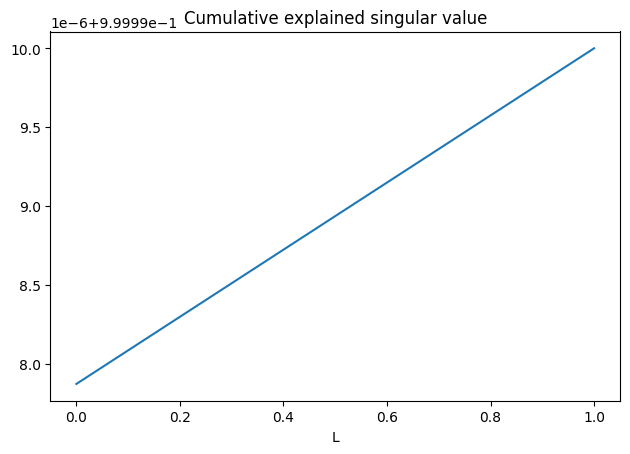

In [20]:
# Esta línea crea una nueva figura para el gráfico.
plt.figure()

# Aquí se traza la gráfica de la suma acumulativa normalizada de los valores singulares. Se divide cada elemento en el vector cum por la variable suma para obtener la suma acumulativa normalizada. Esto se hace para representar la proporción de la varianza total explicada por cada valor singular.
plt.plot(np.cumsum(s)/s.sum())

# Esta línea establece la etiqueta del eje x de la gráfica como 'L'.
plt.xlabel('L')

# Aquí se establece el título de la gráfica como 'Valor singular acumulado explicado'.
plt.title('Cumulative explained singular value')

# Esta línea ajusta automáticamente los espacios entre los elementos de la figura para que se vea de manera más compacta y ordenada.
plt.tight_layout()

# Finalmente, esta línea muestra la figura con la gráfica en pantalla.
plt.show()

$ \ $

-----

## ***Truncated SVD in Sklearn***

$ \ $


Truncated $SVD$ performs linear $PCA$, which is a method of dimensionality reduction. In contrast to $PCA$, Truncated $SVD$ does not center the data before computing the singular value decomposition. This property makes it efficient for handling sparse matrices, where centering the data might not be desirable due to the potential loss of sparsity. We can represent the Truncated $SVD$ as follows:

$ \ $

Given an input matrix $X$ with dimensions $m \times n$, where $m$ represents the number of samples and $n$ represents the number of features, Truncated $SVD$ decomposes $X$ into the product of three matrices:

$$X = U \cdot Σ \cdot V^T$$

where

* $U$ is an $m \times k$ orthogonal matrix,

* $Σ$ is a diagonal $k \times k$ matrix containing the singular values $σ_{1}$, $σ_{2}$, ..., $σ_{k}$,

* $V^{T}$ is the transpose of an $n \times k$ orthogonal matrix. The parameter $k$ represents the desired dimensionality of the output data.

The Truncated $SVD$ implementation in `sklearn.decomposition.TruncatedSVD` provides the following important parameters:

- `n_components`: An integer parameter that specifies the desired dimensionality of the output data. If the chosen algorithm is 'arpack', the value of n_components must be strictly less than the number of features ($n$). If the algorithm is set to 'randomized', it must be less than or equal to the number of features. The default value of $2$ is often useful for visualization purposes.

- `algorithm`: A string parameter that determines the $SVD$ solver to be used. You have two options:

>> 'arpack' utilizes the ARPACK wrapper in SciPy (scipy.sparse.linalg.svds),

>> 'randomized' employs the randomized algorithm introduced by [Halko (2009)](https://arxiv.org/abs/0909.4061?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01).

- `n_iter`: An integer parameter that specifies the number of iterations for the randomized $SVD$ solver. This parameter is not used by the ARPACK solver. The default value of $5$ is typically larger than the default  in [randomized_svd](https://scikit-learn.org/stable/modules/generated/sklearn.utils.extmath.randomized_svd.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#sklearn.utils.extmath.randomized_svd) to handle sparse matrices that may have large slowly decaying spectrum.

For more detailed information, you can refer to the scikit-learn documentation on [TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01).

$ \ $

$(1)$ First we create a TruncatedSVD object setting ```n_components=1``` this is analogous to ```L=1```.


In [21]:
svd_trun = TruncatedSVD(n_components = 1, random_state = 42)

$ \ $

$(2)$ ```fit_transform```  behaves like the projections onto the principle components.


In [22]:
Z = svd_trun.fit_transform(X)
Z

array([[2.23606798],
       [4.47213595],
       [8.94436135]])

$ \ $

$(3)$ Using `inverse_transform`, we can find the approximation of the original $X$.


In [23]:
# esta linea está calculando la reconstrucción de una matriz a partir de una representación comprimida utilizando la matriz de valores singulares truncados (svd_trun) y el vector Z.
X_hat = svd_trun.inverse_transform(Z)

# esta liena crea una matriz nueva a partir de la matriz reconstruida X_hat y luego redondeando los valores a los números enteros más cercanos.
Matrix(np.round(X_hat))

⎡1.0  2.0⎤
⎢        ⎥
⎢2.0  4.0⎥
⎢        ⎥
⎣4.0  8.0⎦

$ \ $

----

## ***Background Model using SVD***

$ \ $


In this section, we will utilize Singular Value Decomposition (SVD) to develop a $\color{lightblue}{\text{Background Model}}$ (Modelo de fondo). $\color{lightgreen}{\text{Background subtraction}}$ (sustracción de fondo) is a commonly employed technique for detecting moving objects in a sequence of frames captured by stationary cameras. The fundamental idea behind this approach is to identify moving objects by comparing the current frame with a reference frame, which is often referred to as the $\color{lightblue}{\text{'Background Image' or 'Background Model'}}$.

$ \ $

The function ***get_data_Matrix*** is responsible for creating a Design matrix, denoted as $X$, where each row represents a flattened image of a sidewalk (imagen aplanada de una acera) captured by a camera, with pedestrians present (peatones presentes). The rectangular dimensions of the sidewalk image are denoted as Length and Width. By utilizing $SVD$, we aim to remove the pedestrians from the images. Now, let's delve into the mathematical explanation:

$ \ $

$(\checkmark)$ We start by constructing the Design matrix $X$, which has dimensions $m \times n$. Here, $m$ represents the number of sidewalk images captured, and $n$ represents the total number of pixels in each flattened image.

$(\checkmark)$ By applying $SVD$ to $X$, we decompose it into three matrices: $U$, $Σ$ and $V^{T}$.

* $\color{lightblue}{\text{Matrix U:}}$ This matrix of dimensions $m \times m$ contains the left singular vectors. Each column represents a basis vector that captures a specific pattern or feature in the sidewalk images.

* $\color{lightblue}{\text{Matrix Σ:}}$ This diagonal matrix of dimensions $m \times n$ contains the singular values. The singular values represent the significance or importance of each basis vector. The singular values are sorted in descending order, with the most significant values appearing at the beginning.

* $\color{lightblue}{\text{Matrix $V^T$:}}$ This matrix of dimensions $n \times n$ contains the right singular vectors. Each column represents a basis vector that describes the contribution of each pixel to the sidewalk images.

$(\checkmark)$ Our goal is to remove the pedestrians from the sidewalk images. We can achieve this by selecting a subset of the most significant singular values and their corresponding singular vectors from $U, Σ$, and $V^T$. These selected singular values and vectors will form the truncated $SVD$, denoted as $U_{trunc}$, $Σ_{trunc}$, and $V_{trunc}^{T}$.

$(\checkmark)$ Finally, we reconstruct the Background Model, denoted as $\overset{\sim}{X}$, by multiplying $U_{trunc}$, $Σ_{trunc}$, and $V_{trunc}^{T}$. The reconstructed matrix  $\overset{\sim}{X}$ will have the same dimensions as the original Design matrix $X$.

$ \ $

By using the truncated $SVD$, we effectively remove the pedestrian-related information from the Design matrix $X$, resulting in a Background Model that emphasizes the static elements of the sidewalk images. This Background Model can then be used for further analysis or as a reference frame for background subtraction algorithms to detect moving objects in subsequent frames.

$ \ $

$(1)$ We use the function ***get_data_Matrix*** to get the array  $X$, as well as the variables Length and Width.



In [24]:
X, Length, Width = get_data_Matrix(mypath = "peds")

$ \ $

$(2)$ We can see that there are $170$ images in the dataset and each is $152 \times 232$ ($32654$ pixels).


In [25]:
print("Tamaño del array =", X.shape)
print("Longitud = ", Length)
print("Ancho = ", Width)

Tamaño del array = (170, 35264)
Longitud =  152
Ancho =  232


$ \ $

$(3)$ We can plot five random images from the matrix.

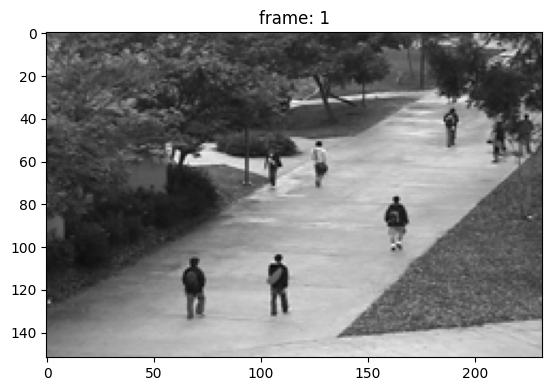

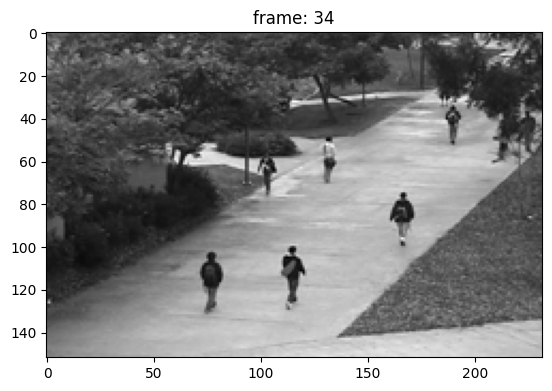

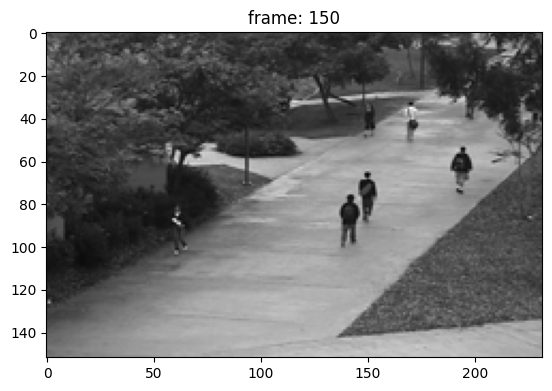

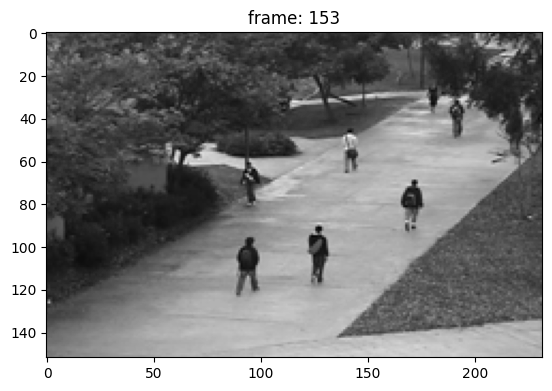

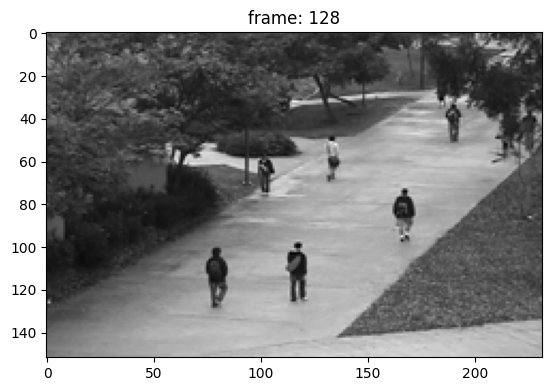

In [26]:
# realizamos una iteracion sobre el iterable {0,1,2,3,4}
for i in range(5):

    # Se selecciona de manera aleatoria un índice de fotograma utilizando la función randint(0, X.shape[0]-1).
    frame = randint(0, X.shape[0]-1)

    # A continuación, se selecciona un fotograma aleatorio de la matriz X utilizando el índice aleatorio generado anteriormente
    photo = X[frame, :]

    # El fotograma seleccionado se remodela a una matriz 2D con dimensiones Length y Width utilizando la función reshape(Length,Width)
    photo = photo.reshape(Length, Width)

    # mostramos el fotograma remodelado utilizando la función imshow de la biblioteca matplotlib.pyplot, y se aplica un mapa de colores en escala de grises (cmap = "gray").
    plt.imshow(photo, cmap = "gray")

    # Finalmente, se agrega un título al gráfico que indica el número de fotograma (plt.title("frame: "+str(frame)))
    plt.title("frame: " + str(frame))

    # se muestra el gráfico en pantalla
    plt.show()

$ \ $

$(4)$ We perform $SVD$ on the images.

In [27]:
U, s, VT = svd(X, full_matrices = False)

In [28]:
S = np.diag(s)

$ \ $

$(5)$ We can reconstruct the image using Truncated $SVD$ with $L=1$ and assign the result to to $\overset{\sim}{X}$.

In [29]:
# Se define un valor entero L, que representa el número de valores singulares seleccionados para aproximar la matriz X
L = 1

# Se reconstruye una aproximación de la matriz original X utilizando los L valores singulares más grandes. La matriz aproximada X_hat se obtiene multiplicando las primeras L columnas de U, los primeros L elementos de la diagonal de S y las primeras L filas de VT, en ese orden.
X_hat = U[:,:L] @ S[0:L, 0:L] @ VT[:L,:]

$ \ $

$(6)$ We plot the first image and we will see the pedestrians are gone.

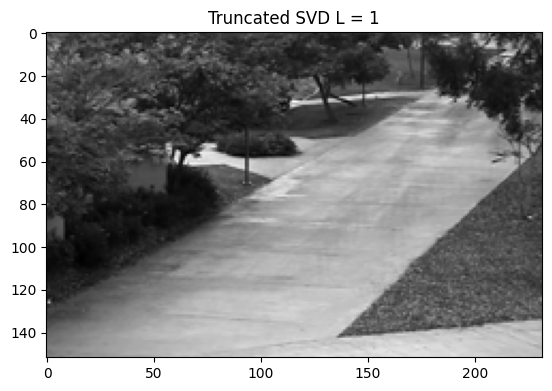

In [30]:
# Se selecciona la primera fila de la matriz X_hat
photo = X_hat[0,:]

# se remodela el array photo con las dimensiones Length y Width. para obtener una matriz 2D con dimensiones Length y Width. Esto se realiza utilizando la función reshape().
photo = photo.reshape(Length, Width)

# El array photo se muestra como una imagen en escala de grises utilizando la función imshow() de matplotlib.pyplot. Se utiliza el mapa de colores "gray" para representar los valores de los píxeles.
plt.imshow(photo, cmap = "gray")

# Se agrega un título al gráfico que indica que se está utilizando la descomposición SVD truncada con L = 1 (es decir, se ha seleccionado un solo valor singular).
plt.title('Truncated SVD L = 1')

# Se muestra la imagen en pantalla
plt.show()

$ \ $

-----

## ***Exercises***

$ \ $

$(1)$ Reshape the $5$ random rows of $\overset{\sim}{X}$ and plot them as images.

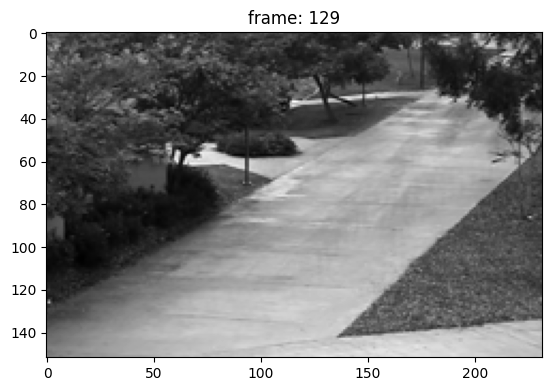

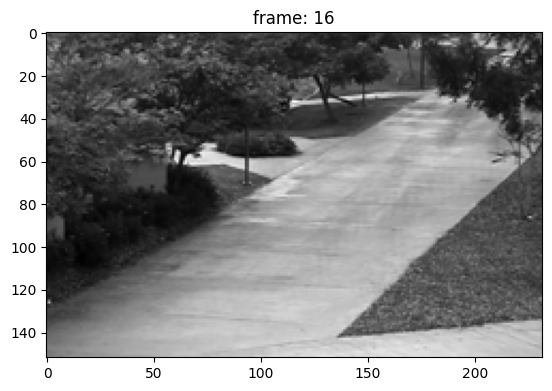

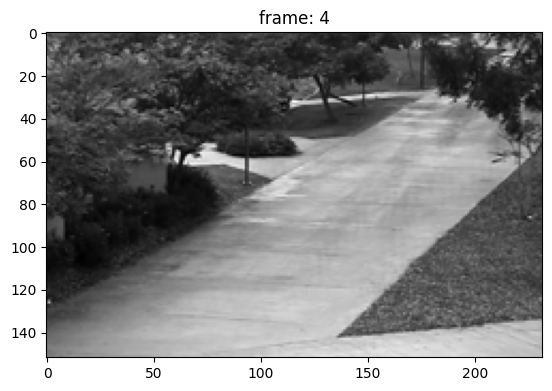

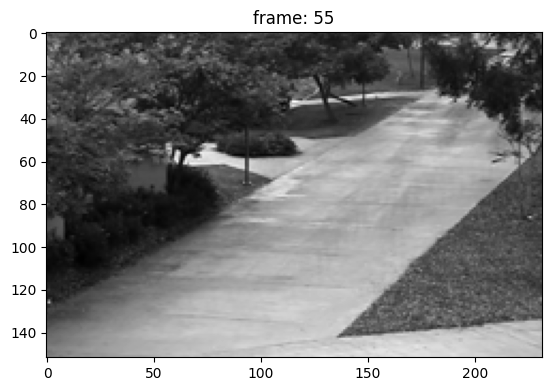

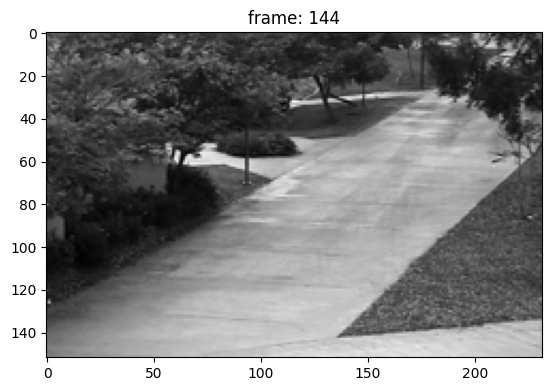

In [31]:
# realizamos una iteracion sobre el iterable {0,1,2,3,4}
for i in range(5):

    # Se selecciona de manera aleatoria un índice de fotograma utilizando la función randint(0, X.shape[0]-1).
    frame = randint(0, X.shape[0]-1)

    # A continuación, se selecciona un fotograma aleatorio del array X_hat utilizando el índice aleatorio generado anteriormente
    photo = X_hat[frame, :]

    # El fotograma seleccionado se remodela a una matriz 2D con dimensiones Length y Width utilizando la función reshape(Length,Width)
    photo = photo.reshape(Length, Width)

    # mostramos el fotograma remodelado utilizando la función imshow de la biblioteca matplotlib.pyplot, y se aplica un mapa de colores en escala de grises (cmap = "gray").
    plt.imshow(photo, cmap = "gray")

    # Finalmente, se agrega un título al gráfico que indica el número de fotograma (plt.title("frame: "+str(frame)))
    plt.title("frame: " + str(frame))

    # se muestra el gráfico en pantalla
    plt.show()

From the exercise above that the rows of the matrix $\overset{\sim}{X}$ are all similar . The $L$ determines the reconstruction properties.

$ \ $

$(2)$ Plot the Cumulative explained variance against the number of singular values $L$.

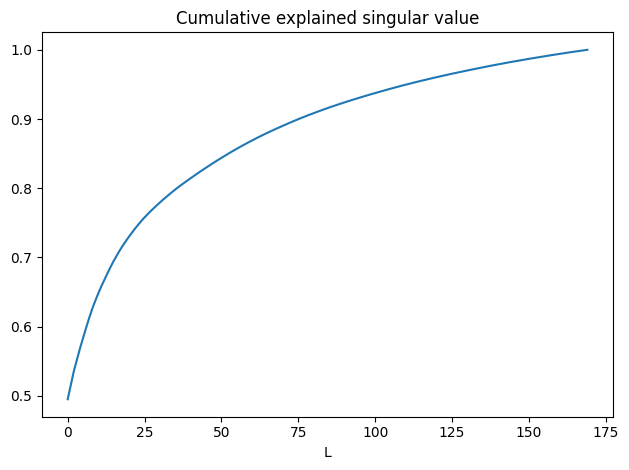

In [32]:
# Esta línea crea una nueva figura para el gráfico.
plt.figure()

# Aquí se traza la gráfica de la suma acumulativa normalizada de los valores singulares. Se divide cada elemento en el vector cum por la variable suma para obtener la suma acumulativa normalizada. Esto se hace para representar la proporción de la varianza total explicada por cada valor singular.
plt.plot(np.cumsum(s)/s.sum())

# Esta línea establece la etiqueta del eje x de la gráfica como 'L'.
plt.xlabel('L')

# Aquí se establece el título de la gráfica como 'Valor singular acumulado explicado'.
plt.title('Cumulative explained singular value')

# Esta línea ajusta automáticamente los espacios entre los elementos de la figura para que se vea de manera más compacta y ordenada.
plt.tight_layout()

# Finalmente, esta línea muestra la figura con la gráfica en pantalla.
plt.show()


$ \ $

$(3)$ Perform Truncated $SVD$ with $L=10$ and plot $5$ random rows of $\overset{\sim}{X}$.

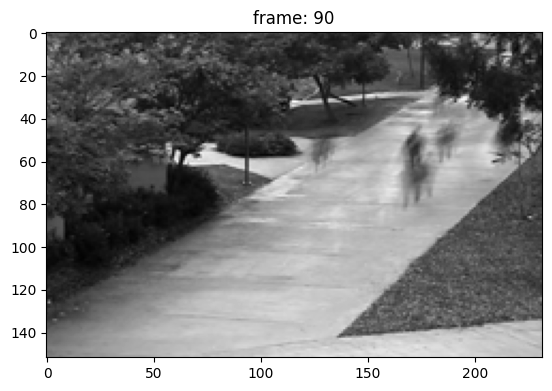

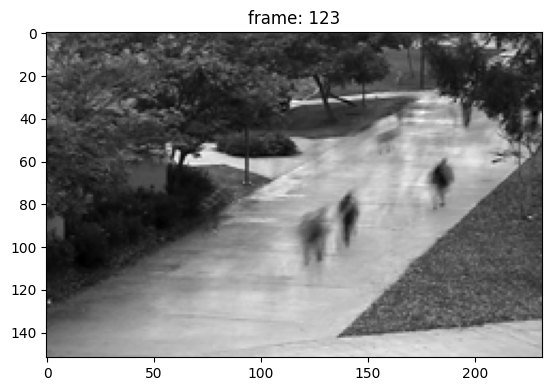

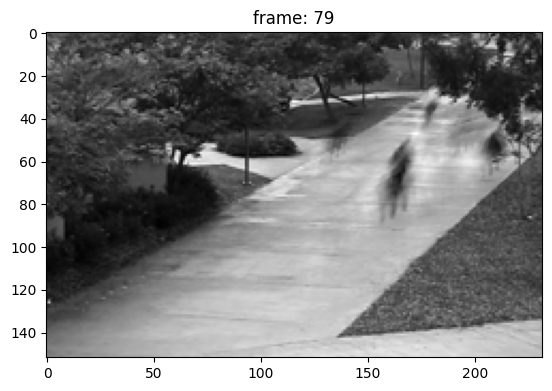

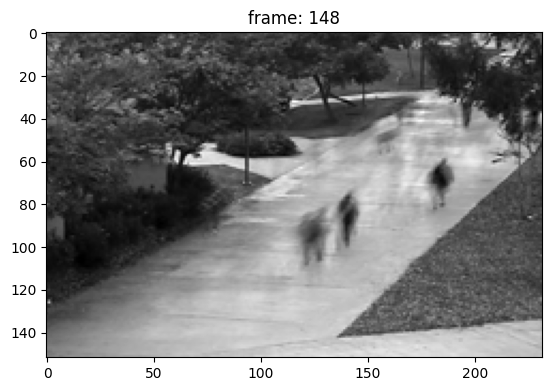

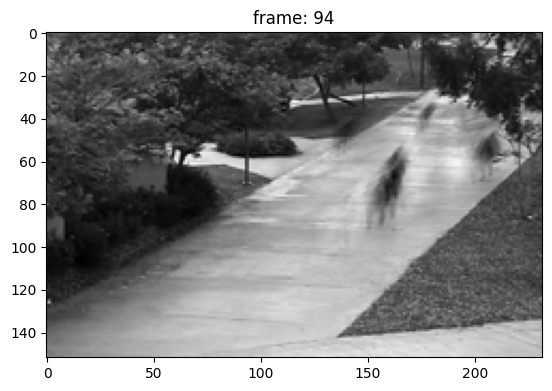

In [33]:
# Se define un valor entero L, que representa el número de valores singulares seleccionados para aproximar la matriz X
L = 10

# Se reconstruye una aproximación de la matriz original X utilizando los L valores singulares más grandes. La matriz aproximada X_hat se obtiene multiplicando las primeras L columnas de U, los primeros L elementos de la diagonal de S y las primeras L filas de VT, en ese orden.
X_hat = U[:,:L] @ S[0:L, 0:L] @ VT[:L,:]

# realizamos una iteracion sobre el iterable {0,1,2,3,4}
for i in range(5):

    # Se selecciona de manera aleatoria un índice de fotograma utilizando la función randint(0, X.shape[0]-1).
    frame = randint(0, X.shape[0]-1)

    # A continuación, se selecciona un fotograma aleatorio del array X_hat utilizando el índice aleatorio generado anteriormente
    photo = X_hat[frame, :]

    # El fotograma seleccionado se remodela a una matriz 2D con dimensiones Length y Width utilizando la función reshape(Length,Width)
    photo = photo.reshape(Length, Width)

    # mostramos el fotograma remodelado utilizando la función imshow de la biblioteca matplotlib.pyplot, y se aplica un mapa de colores en escala de grises (cmap = "gray").
    plt.imshow(photo, cmap = "gray")

    # Finalmente, se agrega un título al gráfico que indica el número de fotograma (plt.title("frame: "+str(frame)))
    plt.title("frame: " + str(frame))

    # se muestra el gráfico en pantalla
    plt.show()

$ \ $

$(4)$  We apply  ***get_data_Matrix*** with:

*  ```mypath = "boats"```

* plot $5$ random boat images.

* Then perform truncated $SVD$ using the function $svd$ with  $L=1$ and plot the first row of $\overset{\sim}{X}$ as an image.

In [34]:
# aplicamos la funcion get_data_Matrix con mypath = "boats"
X, Length, Width = get_data_Matrix (mypath = "boats")

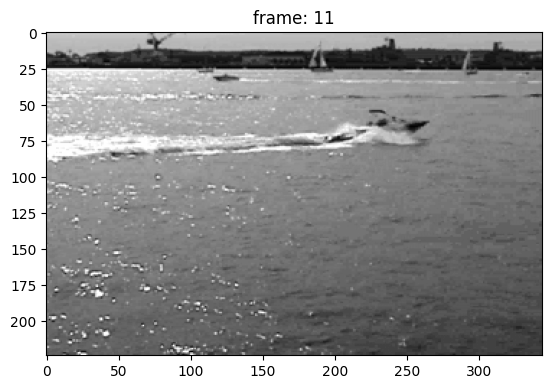

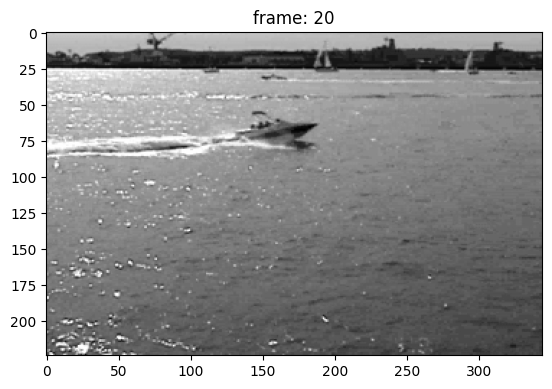

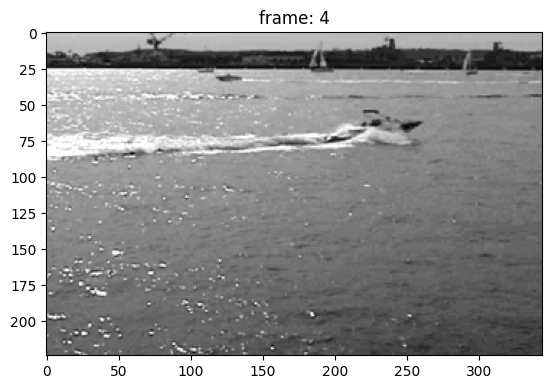

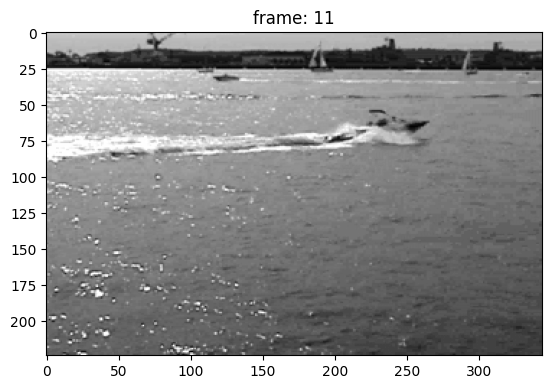

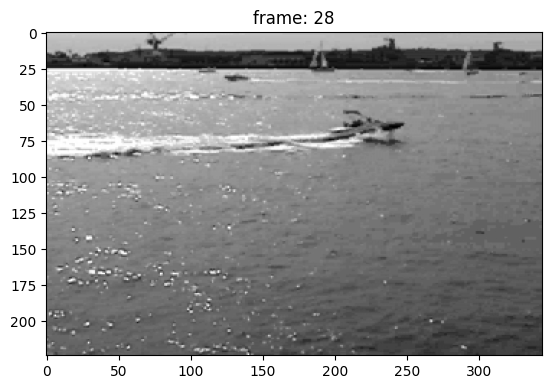

In [35]:
# realizamos una iteracion sobre el iterable {0,1,2,3,4}
for i in range(5):

    # Se selecciona de manera aleatoria un índice de fotograma utilizando la función randint(0, X.shape[0]-1).
    frame = randint(0, X.shape[0]-1)

    # A continuación, se selecciona un fotograma aleatorio del array X_hat utilizando el índice aleatorio generado anteriormente
    photo = X[frame, :]

    # El fotograma seleccionado se remodela a una matriz 2D con dimensiones Length y Width utilizando la función reshape(Length,Width)
    photo = photo.reshape(Length, Width)

    # mostramos el fotograma remodelado utilizando la función imshow de la biblioteca matplotlib.pyplot, y se aplica un mapa de colores en escala de grises (cmap = "gray").
    plt.imshow(photo, cmap = "gray")

    # Finalmente, se agrega un título al gráfico que indica el número de fotograma (plt.title("frame: "+str(frame)))
    plt.title("frame: " + str(frame))

    # se muestra el gráfico en pantalla
    plt.show()

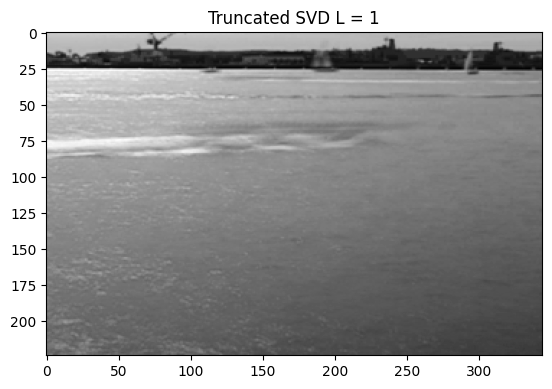

In [36]:
# usamos la funcion svd sobre la data X
U, s, VT = svd(X, full_matrices = False)

# Se define un valor entero L, que representa el número de valores singulares seleccionados para aproximar la matriz X
L = 1

# Se reconstruye una aproximación de la matriz original X utilizando los L valores singulares más grandes. La matriz aproximada X_hat se obtiene multiplicando las primeras L columnas de U, los primeros L elementos de la diagonal de S y las primeras L filas de VT, en ese orden.
X_hat = U[:,:L] @ S[0:L, 0:L] @ VT[:L,:]

# Se selecciona la primera fila de la matriz X_hat
photo = X_hat[0,:]

# se remodela el array photo con las dimensiones Length y Width. para obtener una matriz 2D con dimensiones Length y Width. Esto se realiza utilizando la función reshape().
photo = photo.reshape(Length, Width)

# El array photo se muestra como una imagen en escala de grises utilizando la función imshow() de matplotlib.pyplot. Se utiliza el mapa de colores "gray" para representar los valores de los píxeles.
plt.imshow(photo, cmap = "gray")

# Se agrega un título al gráfico que indica que se está utilizando la descomposición SVD truncada con L = 1 (es decir, se ha seleccionado un solo valor singular).
plt.title('Truncated SVD L = 1')

# Se muestra la imagen en pantalla
plt.show()

$ \ $

$(5)$ Apply   ***get_data_Matrix*** with:

* ```mypath = "traffic"```.

* Plot $5$ random images.

* Perform truncated $SVD$  using `TruncatedSVD` with ```n_components = 1``` and plot the first row of $\overset{\sim}{X}$ as an image.

In [37]:
X, Length, Width = get_data_Matrix(mypath = "traffic")

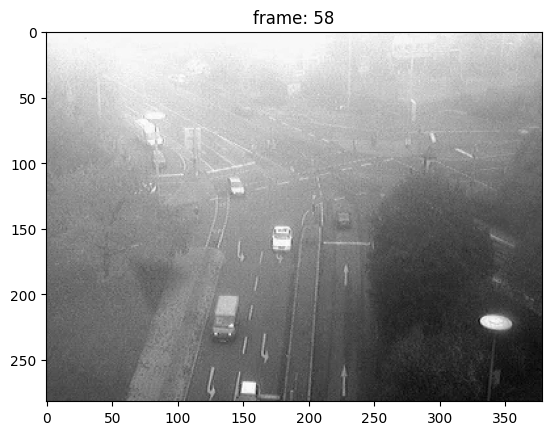

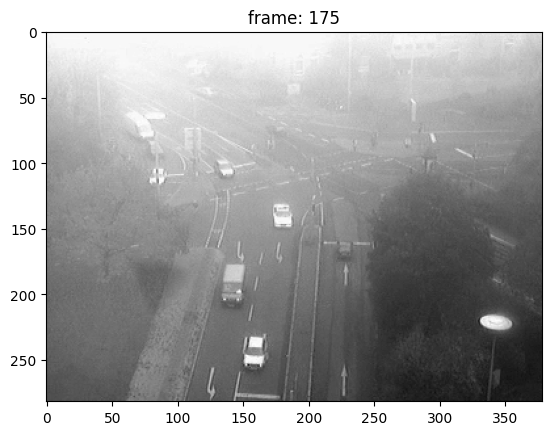

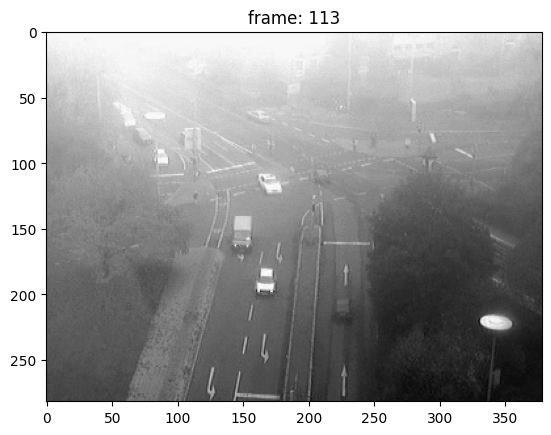

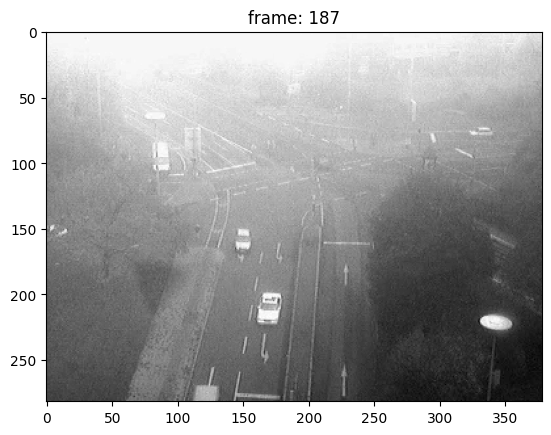

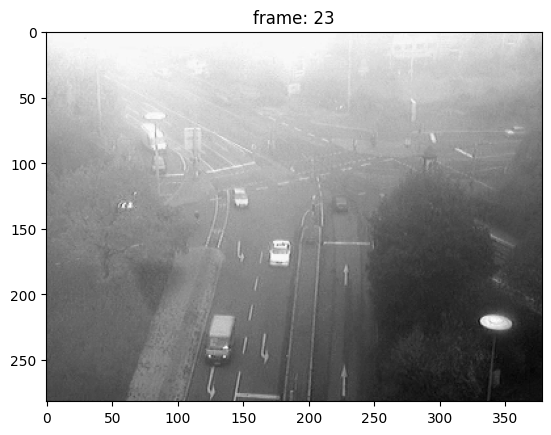

In [38]:
# realizamos una iteracion sobre el iterable {0,1,2,3,4}
for i in range(5):

    # Se selecciona de manera aleatoria un índice de fotograma utilizando la función randint(0, X.shape[0]-1).
    frame = randint(0, X.shape[0]-1)

    # A continuación, se selecciona un fotograma aleatorio del array X_hat utilizando el índice aleatorio generado anteriormente
    photo = X[frame, :]

    # El fotograma seleccionado se remodela a una matriz 2D con dimensiones Length y Width utilizando la función reshape(Length,Width)
    photo = photo.reshape(Length, Width)

    # mostramos el fotograma remodelado utilizando la función imshow de la biblioteca matplotlib.pyplot, y se aplica un mapa de colores en escala de grises (cmap = "gray").
    plt.imshow(photo, cmap = "gray")

    # Finalmente, se agrega un título al gráfico que indica el número de fotograma (plt.title("frame: "+str(frame)))
    plt.title("frame: " + str(frame))

    # se muestra el gráfico en pantalla
    plt.show()


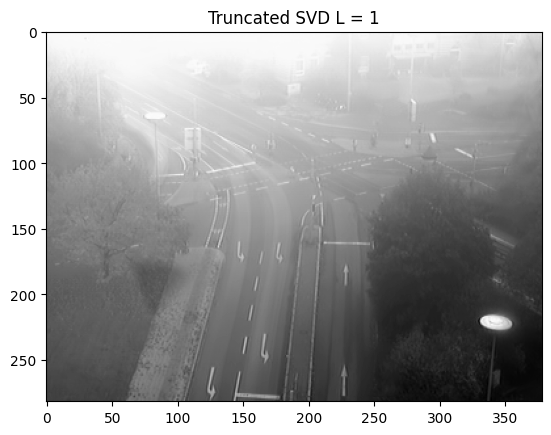

In [39]:
# Se crea una instancia de la clase TruncatedSVD con un parámetro n_components establecido en 1. Esto significa que se seleccionará solo un componente principal para la aproximación. El parámetro n_iter se establece en 7 para especificar el número de iteraciones del algoritmo de SVD truncado, y random_state se establece en 42 para obtener resultados reproducibles.
svd_trun = TruncatedSVD(n_components = 1, n_iter = 7, random_state = 42)

# Se aplica la descomposición SVD truncada a la matriz X y se obtienen los puntajes de los componentes principales
score = svd_trun.fit_transform(X)

# Se reconstruye una aproximación de la matriz original X utilizando los puntajes de los componentes principales. La matriz aproximada X_hat se obtiene aplicando la transformación inversa de la descomposición SVD truncada a los puntajes.
X_hat = svd_trun.inverse_transform(score)

# Se selecciona la primera fila del array X_hat.
photo = X_hat[0, :]

# Se remodela el array photo en una matriz 2D con dimensiones Length y Width
photo = photo.reshape(Length, Width)

# Se muestra una imagen en escala de grises de la primera fila de la matriz aproximada X_hat. La matriz se remodela a una forma 2D con dimensiones Length y Width antes de mostrarla.
plt.imshow(photo, cmap = "gray")

# Se agrega un título al gráfico que indica que se está utilizando la descomposición SVD truncada con L = 1 (un solo valor singular).
plt.title('Truncated SVD L = 1')

# mostramos la imagen creada en pantalla
plt.show()


$ \ $

-----

## ***Relationship between SVD and PCA***

$ \ $


La relación entre SVD y PCA se establece a través de la matriz de datos $X$ y su descomposición en valores singulares. Supongamos que tenemos una matriz de datos $X$ de tamaño $m \times n$, donde $m$ representa el número de observaciones y $n$ representa el número de variables.

$(1)$ $\color{lightblue}{\text{Descomposición SVD de $X$.}}$
La descomposición SVD de la matriz $X$ se define de la siguiente manera:

$$X = U \Sigma V^T$$

donde:

* $U$ es una matriz unitaria (ortogonal) de tamaño $m \times m$.

* $\Sigma$ es una matriz diagonal no negativa de tamaño $m \times n$ con los valores singulares de $X$ ordenados de mayor a menor en la diagonal principal.

* $V^T$ es la traspuesta de una matriz unitaria (ortogonal) de tamaño $n \times n$.

$(2)$ $\color{lightblue}{\text{Relación con PCA.}}$ El PCA busca encontrar una representación reducida de los datos que retenga la mayor cantidad de información posible. La matriz de datos $X$ se puede interpretar como una colección de vectores en un espacio $n$-dimensional. Al aplicar la descomposición SVD a $X$, podemos obtener una relación entre los vectores singulares y los componentes principales de PCA. La matriz $V$ en la descomposición SVD se relaciona con los componentes principales de PCA.
Los componentes principales de PCA se obtienen a partir de los vectores singulares derechos de $V$. Si tomamos los primeros $k$ vectores singulares derechos de $V$, formamos una matriz $V_k$ de tamaño $n \times k$.

$(3)$ $\color{lightblue}{\text{Relación matemática.}}$
La relación entre los componentes principales y los vectores singulares derechos se establece de la siguiente manera:

$$PC = X \cdot V_k$$

donde:

* $PC$ representa la matriz de componentes principales de tamaño $m \times k$.

* $X$ representa la matriz de datos de tamaño $m \times n$.

* $V_k$ representa los primeros $k$ vectores singulares derechos de la matriz $V$.

$(4)$ $\color{lightblue}{\text{Varianza explicada.}}$ La varianza explicada por los componentes principales se puede calcular a partir de los valores singulares en la matriz $\Sigma$. La varianza explicada por el $i$-ésimo componente principal se calcula utilizando la siguiente fórmula:

$$\text{Varianza_Explicada_i} = \frac{{\sigma_{i}^{2}}}{{\sum \limits_{j=1}^{n} \sigma_j^2}} \times 100\%$$

donde $\sigma_i$ es el $i$-ésimo valor singular.

